# Composite distribution

A composite distribution is the distribution of a random variable that is a weighted sum of other random variables:

$P(\Sigma_{i=1}^{n} w_i \cdot X_i \leq x)$ and $\Sigma_{i=1}^{n} w_i = 1.0$

where:
* $X_i$ is a random variable<br>
* $w_i$ is a weight associated with random variable $X_i$ <br>
* $x$ is a realization of the composite variable

In this example, we demonstrate how to define a composite distribution using the probabilistic library.

First, let's import the necessary packages:

In [155]:
from probabilistic_library import DistributionType, ContributingStochast, ConditionalValue, Stochast, StandardNormal
import numpy as np
import matplotlib.pyplot as plt

### Defining a composite distribution

We want to define a composite random variable $w_{1}\cdot X_{1} + w_{2} \cdot X_{2}$, where $X_1$ is normally distributed with mean $1.0$ and standard deviation $0.5$, and $X_2$ is normally distributed with mean $4.0$ and standard deviation $0.3$. The weights are $0.2$ and $0.8$, respectively.

To define such a variable, we first define the variables $X_1$ and $X_2$. This is done in the standard way:

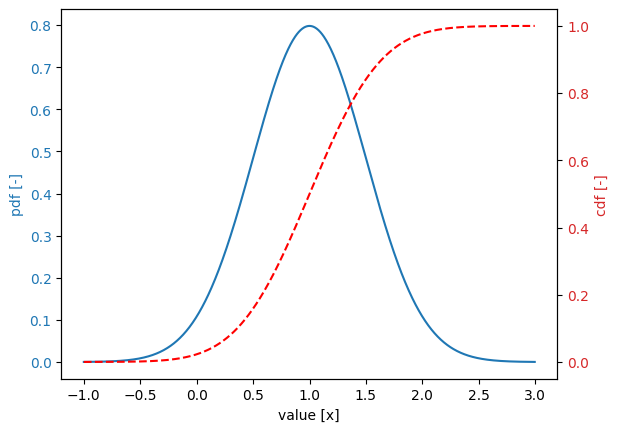

In [156]:
x1 = Stochast()
x1.distribution = DistributionType.normal
x1.location = 1.0
x1.scale = 0.5
x1.plot()

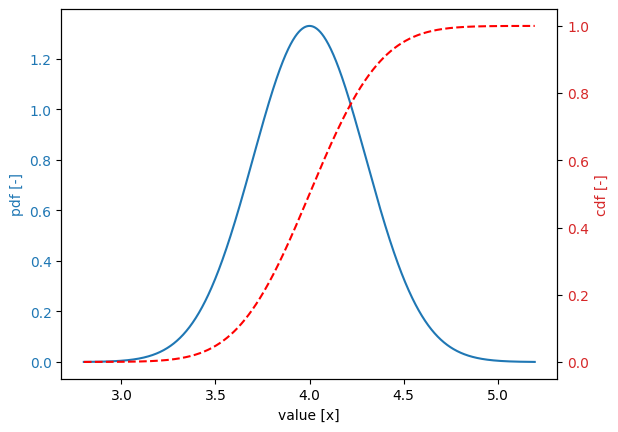

In [157]:
x2 = Stochast()
x2.distribution = DistributionType.normal
x2.location = 4.0
x2.scale = 0.3
x2.plot()

Next, we create a new random variable of `composite` type and append the two contributing random variables and their corresponding weights using the `ContributingStochast` class.

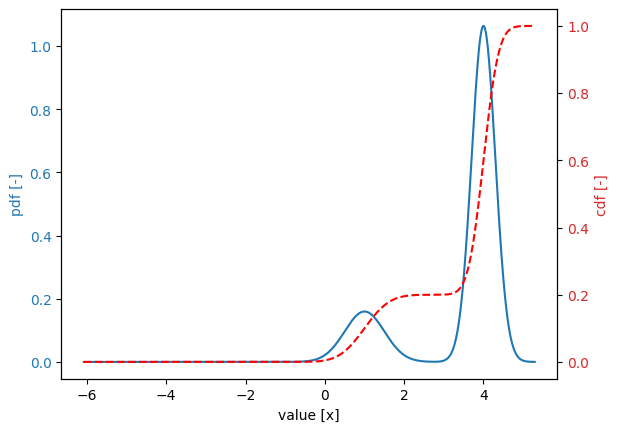

In [ ]:
w1 = 0.2
w2 = 0.8

stochast = Stochast()
stochast.distribution = DistributionType.composite
stochast.contributing_stochasts.append(ContributingStochast.create(w1, x1))
stochast.contributing_stochasts.append(ContributingStochast.create(w2, x2))

stochast.plot()

### Defining a composite conditional distribution

We can make this example more complex by making the second variable, $X_2$, conditional on a certain source variable, which is not relevant for this example. This is done as follows:

In [159]:
x2 = Stochast()
x2.distribution = DistributionType.normal
x2.conditional = True

source_value = [1.0, 4.0]
mu = [1.0, 4.0]
sigma = [0.5, 0.3]
for ii in range(0, len(source_value)):
    conditional = ConditionalValue()
    conditional.x = source_value[ii]
    conditional.location = mu[ii]
    conditional.scale = sigma[ii]
    x2.conditional_values.append(conditional)

We create the composite random variable:

In [160]:
stochast = Stochast()
stochast.distribution = DistributionType.composite
stochast.contributing_stochasts.append(ContributingStochast.create(w1, x1))
stochast.contributing_stochasts.append(ContributingStochast.create(w2, x2))

When the source variable is equal to $4.0$, then the distribution of the composite variable is the same as in the first example:

Text(0.5, 1.0, 'Cdf of composite distribution, source = 4.0')

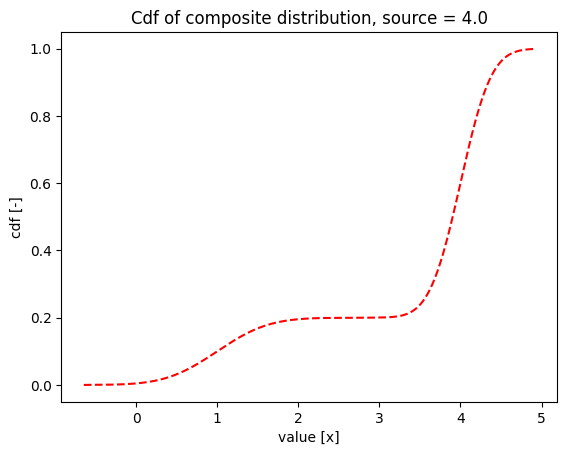

In [161]:
source_value = 4.0
p = np.arange(0.0001, 1.0, 0.001)
u = [StandardNormal.get_u_from_p(val) for val in p]
x = [stochast.get_x_from_u_and_source(val, source_value) for val in u]
plt.plot(x, p, 'r--')
plt.xlabel('value [x]')
plt.ylabel('cdf [-]')
plt.title(f'Cdf of composite distribution, source = {source_value}')

When the source variable is equal to $1.0$, then the distribution of the composite variable is equal to the distribution of $X_1$:

Text(0.5, 1.0, 'Cdf of composite distribution, source = 1.0')

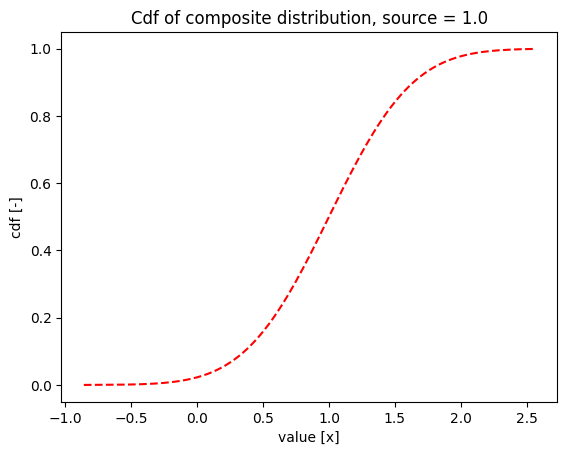

In [162]:
source_value = 1.0
x = [stochast.get_x_from_u_and_source(val, source_value) for val in u]
plt.plot(x, p, 'r--')
plt.xlabel('value [x]')
plt.ylabel('cdf [-]')
plt.title(f'Cdf of composite distribution, source = {source_value}')